# Problem Statement: **Worldwide Billionaires Analysis**

## **Description:**

* **The number of billionaires in the world has quadrupled in the last 20 years. In 2023, there are 2,640 billionaires with a combined net worth of $12.2 trillion. The `United States` has the most billionaires `(735)`, followed by `China (562)`, `India (169)`, `Germany (126)`, and `Russia (105)`. The wealthiest people on the planet are still overwhelmingly male, but the number of women billionaires is increasing. The world's richest woman is `Francoise Bettencourt` Meyers of France, whose grandfather founded beauty giant L'Oréal.**

* **The wealth of billionaires is concentrated in a few industries. The technology sector is home to the most billionaires, followed by finance, retail, and real estate. The richest billionaires made their fortunes in a variety of ways, but the most common paths to wealth are through technology, finance, and manufacturing.**

* **The number of billionaires has declined for two consecutive years, due to a combination of factors including the COVID-19 pandemic and the war in Ukraine. However, the overall wealth of billionaires remains high. The top 10 richest people in the world are worth a combined $593 billion, more than the GDP of most countries.**

* **The concentration of wealth among billionaires has a number of implications for the global economy. It can lead to increased inequality, as the gap between the rich and the poor widens. It can also make it more difficult for governments to regulate the economy, as billionaires have the resources to lobby for their interests.**

* **The analysis of worldwide billionaires is a complex and ever-changing field. New billionaires are created every year, and the fortunes of existing billionaires can fluctuate wildly. However, the overall trend is clear: the number of billionaires is increasing, and their wealth is becoming increasingly concentrated. This trend has important implications for the global economy, and it is one that will continue to be closely watched in the years to come.**



# 1.0. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

# 2.0. The Datasets

In [3]:
df=pd.read_csv('Forbes Billionaires.csv')
df.head()

Rank                        Name  Networth  Age        Country  \
0      1                 Elon Musk      219.0   50  United States   
1      2                Jeff Bezos      171.0   58  United States   
2      3  Bernard Arnault & family      158.0   73         France   
3      4                Bill Gates      129.0   66  United States   
4      5            Warren Buffett      118.0   91  United States   

               Source                Industry  
0       Tesla, SpaceX             Automotive   
1              Amazon             Technology   
2                LVMH       Fashion & Retail   
3           Microsoft             Technology   
4  Berkshire Hathaway  Finance & Investments

## 2.1. Datasets Infromation

Here is an explanation of all the features in the Forbes Billionaires dataset:

* **Rank:** The rank of the billionaire in the Forbes list.
* **Name:** The name of the billionaire.
* **Source:** The source of the billionaire's wealth.
* **Net Worth:** The estimated net worth of the billionaire in US dollars.
* **Age:** The age of the billionaire.
* **Country:** The country of residence of the billionaire.
* **Industry:** The industry in which the billionaire made their 

The dataset also includes some additional features, such as the billionaire's spouse, children, and education. However, these features are not always available for all billionaires.

# 3.0. Data Exploration

In [5]:
df.shape

(2600, 7)

* Total 2600 Observation and 7 Features

* let's check relationship b/w nemerical features


In [7]:
df.describe()

Rank      Networth          Age
count  2600.000000  2600.000000  2600.000000
mean   1269.570769     4.860750    64.271923
std     728.146364    10.659671    13.220607
min       1.000000     1.000000    19.000000
25%     637.000000     1.500000    55.000000
50%    1292.000000     2.400000    64.000000
75%    1929.000000     4.500000    74.000000
max    2578.000000   219.000000   100.000000

* maximum networth is 219.0
* Minimum age is `19`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


* Checking Null value

In [8]:
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

* No null value presents

# 4.0. Data Visualization

In [9]:
plt.style.use('dark_background')

## 4.1. Top 10 Countries with Most Billionaires

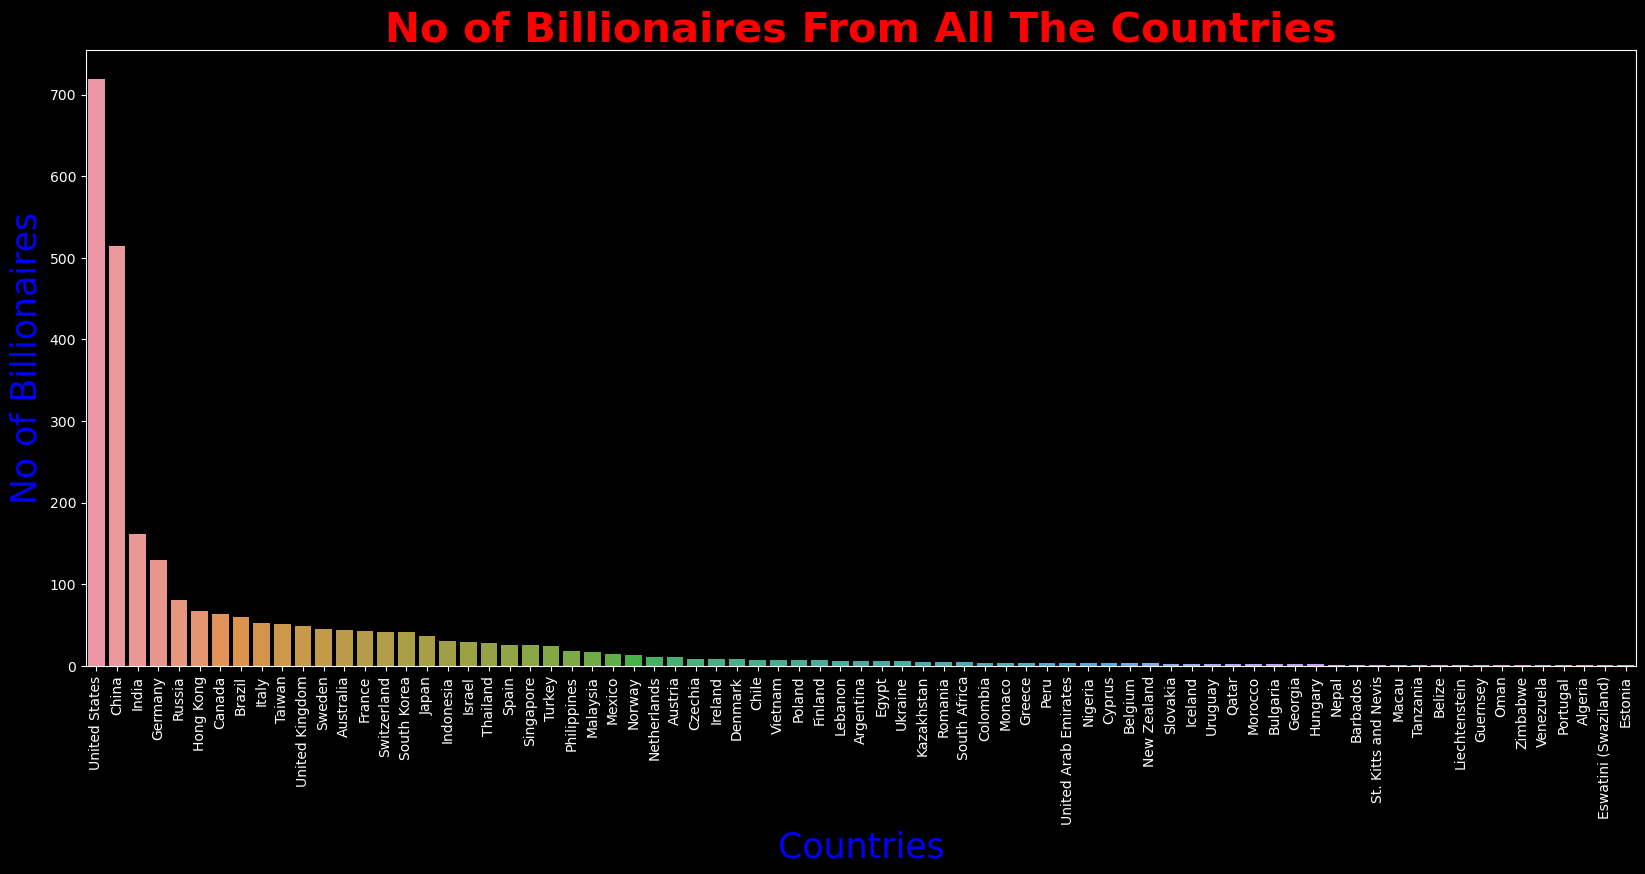

In [15]:
plt.figure(figsize=(20,8))
sns.countplot( data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("No of Billionaires", fontsize=25,color='blue')
plt.xlabel("Countries", fontsize=25,color='blue')
plt.title("No of Billionaires From All The Countries", fontsize=30,weight='bold',color='red')
plt.show()

* Here above observation report:

1. United States  =>>          719
2. China            =>>        515
3. India               =>>       161
4. Germany                =>>130
5. Russia                    =>> 81
6. Hong Kong               =>>67
7. Canada                   =>>64
8. Brazil                      =>>60
9. Italy                   =>>52
10. Taiwan                =>> 51

## 4.2. NetWorth V/s Country

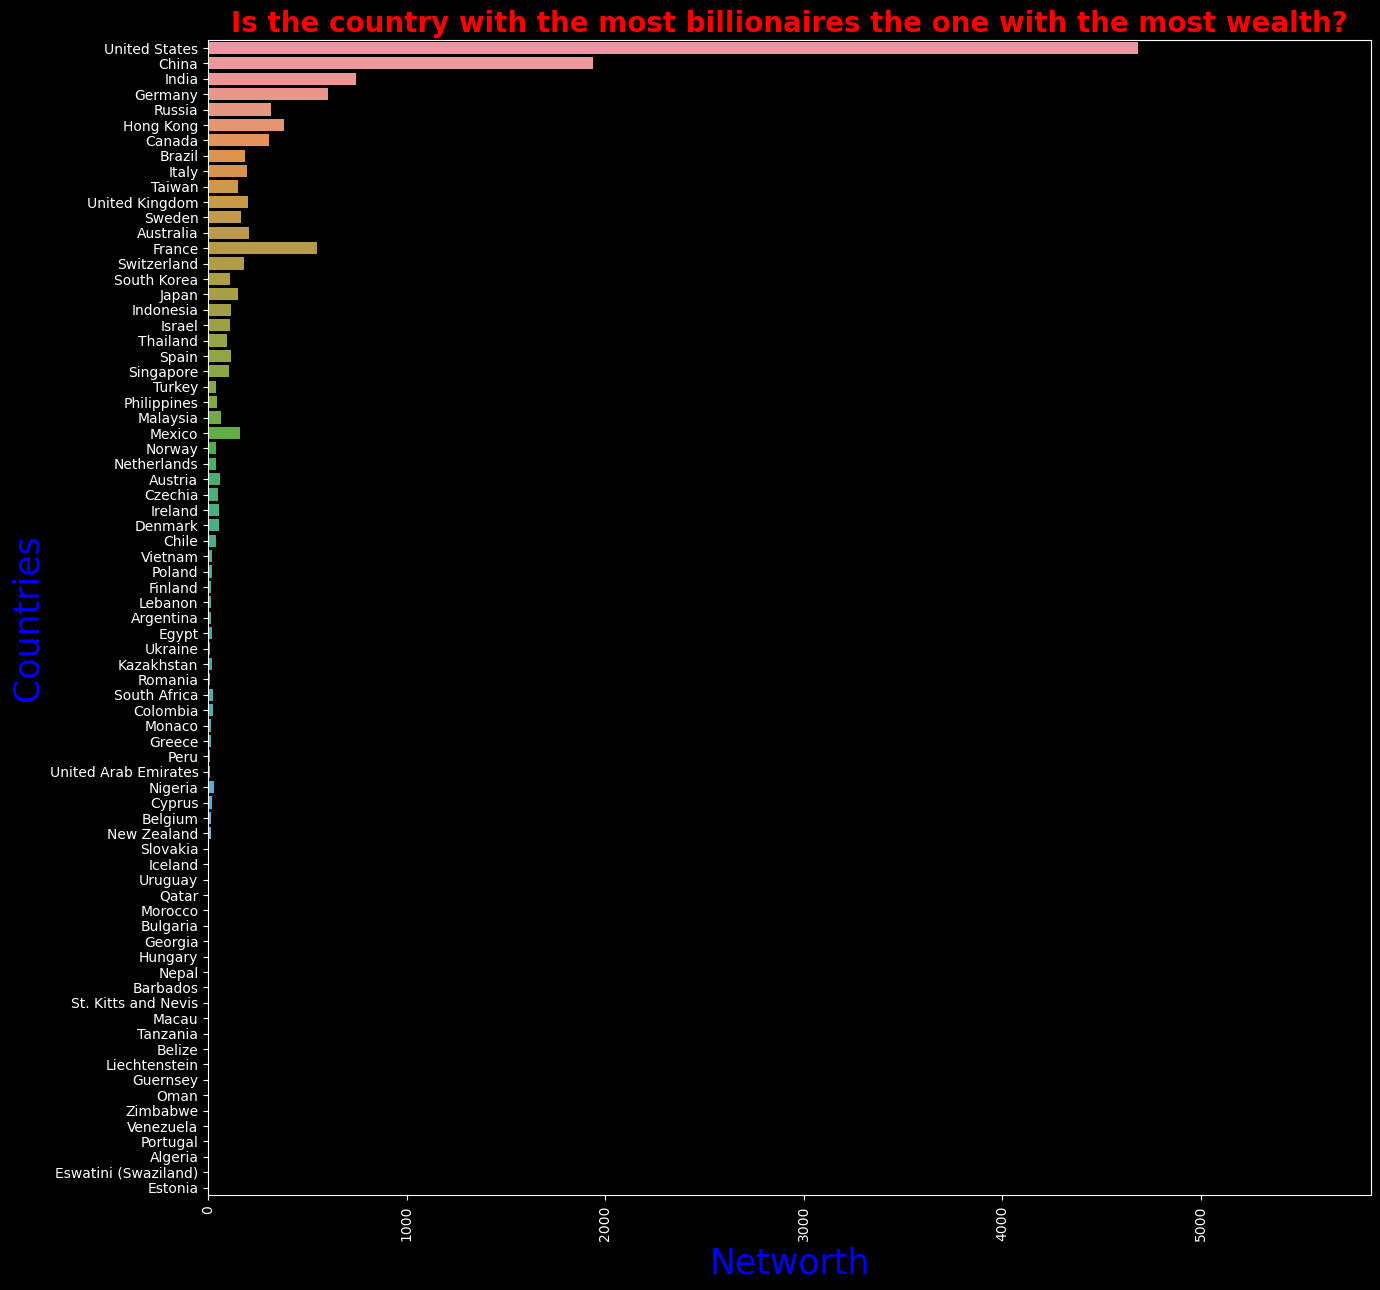

In [21]:
plt.figure(figsize=(15,15))
sns.barplot( data=df, x="Networth",y='Country', order=df['Country'].value_counts().index,estimator=sum,errwidth=0)
plt.xticks(rotation=90)
plt.ylabel("Countries", fontsize=25,color='blue')
plt.xlabel("Networth", fontsize=25,color='blue')
plt.title("Is the country with the most billionaires the one with the most wealth?", fontsize=20,weight='bold',color='red')
plt.show()

* As we can see US is far away then follows by China and India

# 4.3. Age Distribution

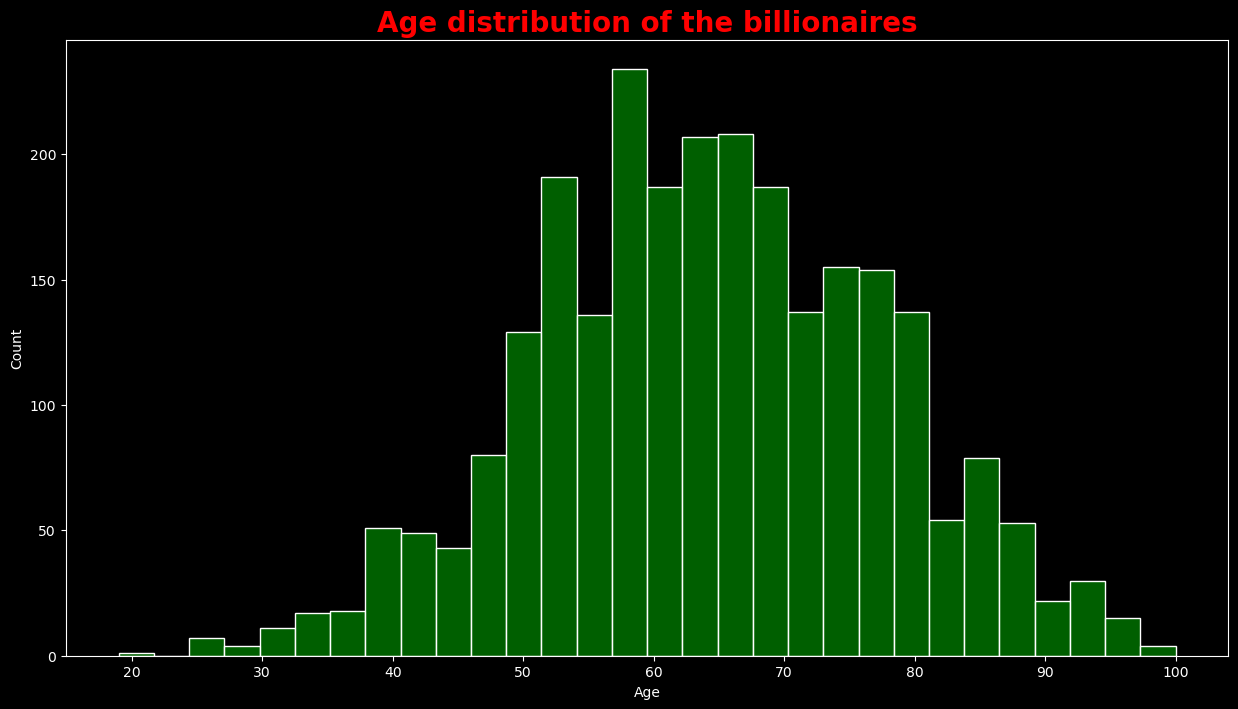

In [23]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'Age', color = 'green')
plt.title('Age distribution of the billionaires',fontsize=20,color='red',weight='bold')
plt.show()

* Most of Billionaires age b/w 50 to 60.

## 4.4. Youngest Billionaire

In [24]:
df.loc[df.Age==df.Age.min()]

Rank                   Name  Networth  Age  Country      Source  \
1311   1292  Kevin David Lehmann        2.4   19  Germany  drugstores   

               Industry  
1311  Fashion & Retail

## 4.5. Oldest Billionaire

In [25]:
df.loc[df.Age==df.Age.max()]

Rank             Name  Networth  Age        Country     Source  \
1681   1645  George Joseph        1.8  100  United States  insurance   

                    Industry  
1681  Finance & Investments

## 4.6. Age Group

In [27]:
df['age_group'] = pd.cut(df['Age'], bins = [18, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])
df.head()

Rank                        Name  Networth  Age        Country  \
0      1                 Elon Musk      219.0   50  United States   
1      2                Jeff Bezos      171.0   58  United States   
2      3  Bernard Arnault & family      158.0   73         France   
3      4                Bill Gates      129.0   66  United States   
4      5            Warren Buffett      118.0   91  United States   

               Source                Industry age_group  
0       Tesla, SpaceX             Automotive      30-50  
1              Amazon             Technology      50-70  
2                LVMH       Fashion & Retail        70+  
3           Microsoft             Technology      50-70  
4  Berkshire Hathaway  Finance & Investments        70+

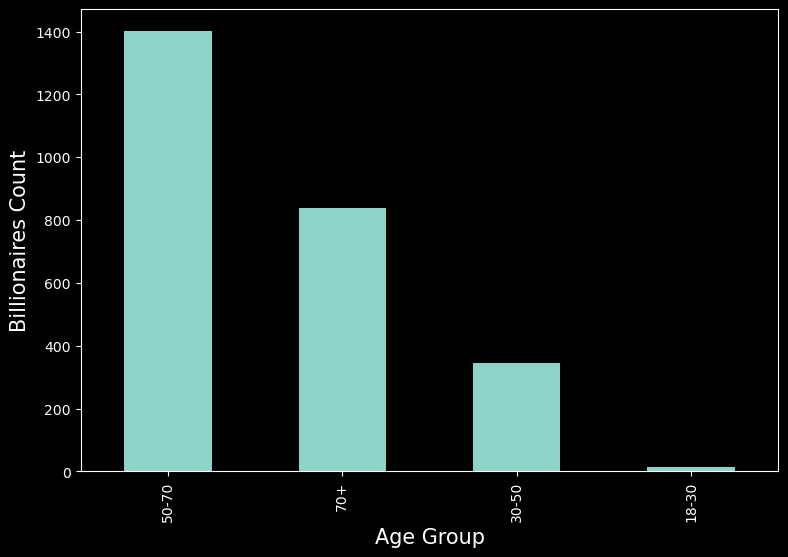

In [28]:

df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Billionaires Count", fontsize=15)
plt.show()

## 4.7. Now let’s have a look at the top domains with the most number of billionaires:

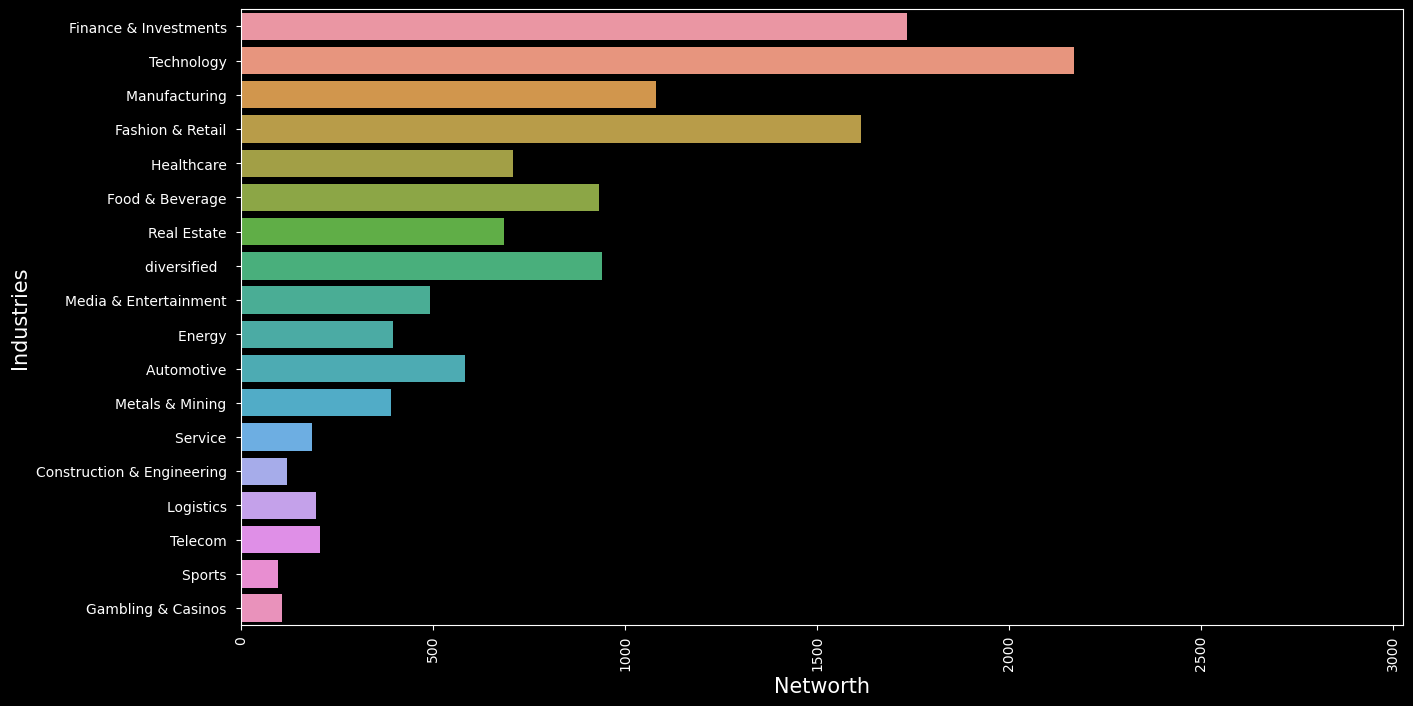

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "Networth", y = "Industry", order = df['Industry'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Industries", fontsize=15)
plt.show()

## 4.8. Source Of Billionaires

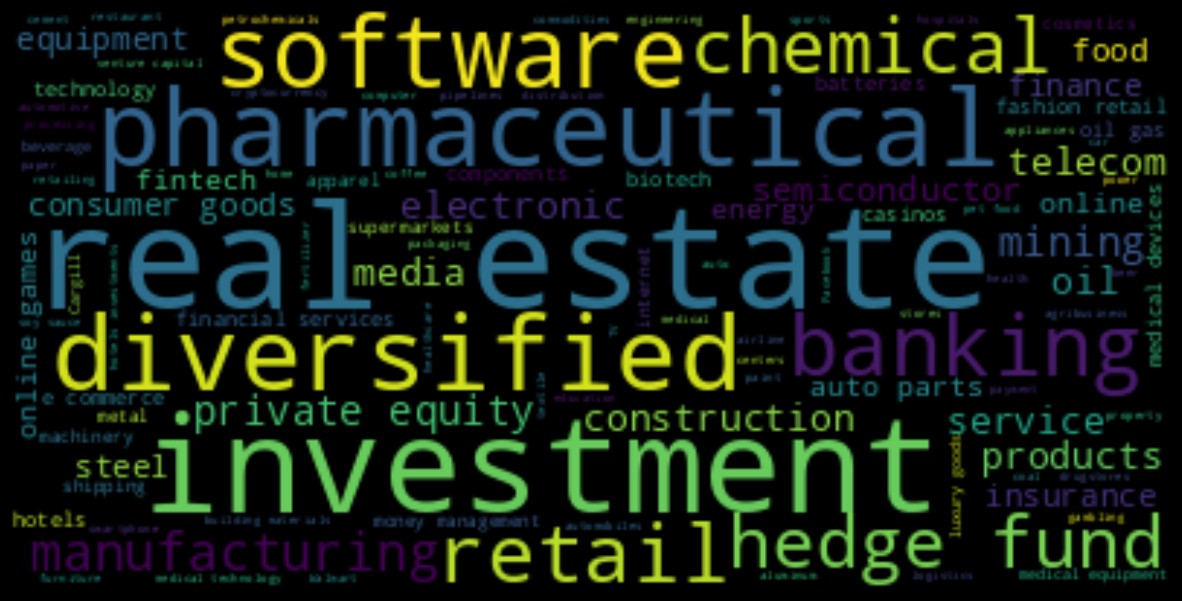

In [31]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in df.Source) 

plt.figure( figsize=(15,10))
wordcloud = WordCloud(
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=50, 
                      random_state=50
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 4.9. Top 5 Billionaires From `India`

In [32]:
indians = df[df['Country'] == 'India']
top_5_indians = indians.sort_values('Networth',ascending=False).head()
df.loc[df['Name'].isin(top_5_indians['Name'])]

Rank                     Name  Networth  Age Country  \
9      10          Mukesh Ambani       90.7   64   India   
10     11  Gautam Adani & family       90.0   59   India   
46     47             Shiv Nadar       28.7   76   India   
56     56       Cyrus Poonawalla       24.3   80   India   
80     81     Radhakishan Damani       20.0   67   India   

                         Source           Industry age_group  
9                 diversified       diversified        50-70  
10  infrastructure, commodities     diversified        50-70  
46            software services        Technology        70+  
56                     vaccines        Healthcare        70+  
80          retail, investments  Fashion & Retail      50-70

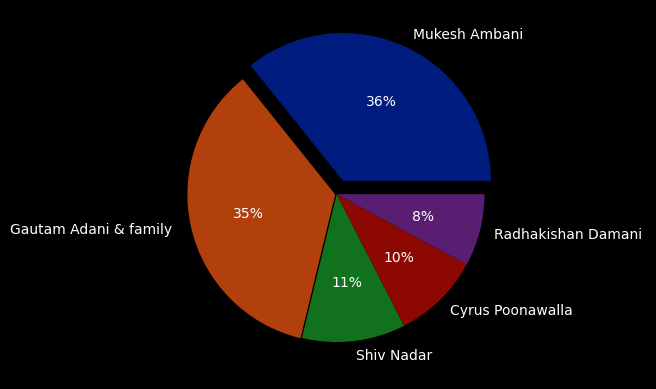

In [33]:
# declaring exploding pie
explode = [0.1, 0.01, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(top_5_indians['Networth'], labels=top_5_indians['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

## 4.1.1. Top 5 Billonaires From `US`

In [34]:
us_df = df[df['Country'] == 'United States'].sort_values('Networth',ascending=False).head()
us_df

Rank              Name  Networth  Age        Country              Source  \
0      1       Elon Musk      219.0   50  United States       Tesla, SpaceX   
1      2      Jeff Bezos      171.0   58  United States              Amazon   
3      4      Bill Gates      129.0   66  United States           Microsoft   
4      5  Warren Buffett      118.0   91  United States  Berkshire Hathaway   
5      6      Larry Page      111.0   49  United States              Google   

                 Industry age_group  
0             Automotive      30-50  
1             Technology      50-70  
3             Technology      50-70  
4  Finance & Investments        70+  
5             Technology      30-50

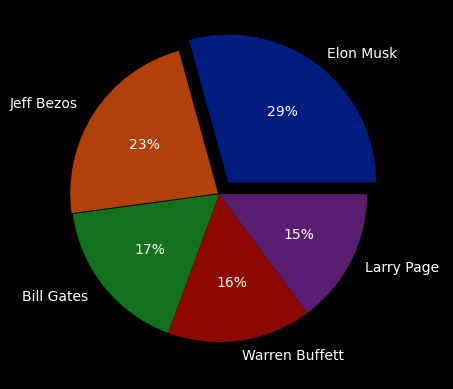

In [35]:
# plotting data on chart
plt.pie(us_df['Networth'], labels=us_df['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

## 4.1.2. Top 5 Billonaires From `China`

In [36]:
china = df[df['Country'] == 'China'].sort_values('Networth',ascending=False).head()
china

Rank                Name  Networth  Age Country  \
16     17    Zhong Shanshan       65.7   67   China   
24     25      Zhang Yiming       50.0   38   China   
33     34        Ma Huateng       37.2   50   China   
48     49      He Xiangjian       28.3   79   China   
54     55  William Lei Ding       25.2   50   China   

                        Source                Industry age_group  
16  beverages, pharmaceuticals        Food & Beverage      50-70  
24                      TikTok  Media & Entertainment      30-50  
33              internet media             Technology      30-50  
48             home appliances          Manufacturing        70+  
54                online games             Technology      30-50

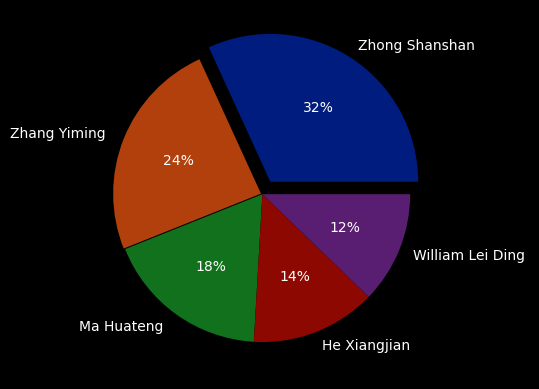

In [37]:
# plotting data on chart
plt.pie(china['Networth'], labels=china['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [38]:
df.columns

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry',
       'age_group'],
      dtype='object')

# Reference

* [Nitin Choudhary](https://www.kaggle.com/code/nitinchoudhary012/data-analysis-forbes-billionaires-detailed-eda/notebook)
* [Aman Kharwal](https://thecleverprogrammer.com/2021/06/24/billionaires-analysis-with-python/)

# **Thank You!**